In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

import warnings
warnings.filterwarnings('ignore')

In [53]:
rowwise = pd.read_csv("./data/out/rowwise.csv")
colwise = pd.read_csv("./data/out/colwise.csv")
blockwise = pd.read_csv("./data/out/blockwise.csv")

typenames = ['rowwise', 'colwise', 'blockwise']

In [54]:
def add_metrics(data):
    def count_speed_up(data: pd.DataFrame):
        new_data = pd.DataFrame()
        for n_rows in data['n_rows'].unique():
            local = data.query('n_rows == @n_rows')
            single_time = local[local['n_processes'] == 1]['time'].iloc[0]
            sup = []
            local['speed_up'] = single_time / local['time']
    
            new_data = pd.concat([new_data, local], axis=0)
    
        new_data = new_data.sort_values(by=['n_processes', 'n_rows'])    
        return new_data
    
    def count_efficiency(data: pd.DataFrame):
        new_data = data.copy()
        new_data['efficiency'] = new_data['speed_up'] / new_data['n_processes']
        
        return new_data  

    data = count_speed_up(data)
    data = count_efficiency(data)

    return data

In [55]:
rowwise = add_metrics(rowwise)
colwise = add_metrics(colwise)
blockwise = add_metrics(blockwise)

datalist = [rowwise, colwise, blockwise]

In [51]:
blockwise

n_rows  n_cols  n_processes      time  speed_up  efficiency
0      120   60000            1  0.022440  1.000000    1.000000
1      240   60000            1  0.042650  1.000000    1.000000
2      360   60000            1  0.063614  1.000000    1.000000
3      480   60000            1  0.084843  1.000000    1.000000
4      600   60000            1  0.106018  1.000000    1.000000
5      720   60000            1  0.127492  1.000000    1.000000
6      840   60000            1  0.148610  1.000000    1.000000
7      960   60000            1  0.169519  1.000000    1.000000
8     1080   60000            1  0.190629  1.000000    1.000000
9     1200   60000            1  0.212321  1.000000    1.000000
10     120   60000            2  0.018337  1.223755    0.611878
11     240   60000            2  0.036071  1.182390    0.591195
12     360   60000            2  0.053620  1.186386    0.593193
13     480   60000            2  0.072006  1.178277    0.589138
14     600   60000            2  0.090105  1.176605    0.588303
15     720   60000            2  0.108247  1.177788    0.588894
16     840   60000            2  0.124688  1.191855    0.595927
17     960   60000            2  0.142697  1.187965    0.593982
18    1080   60000            2  0.161541  1.180066    0.590033
19    1200   60000            2  0.178592  1.188861    0.594430
20     120   60000            6  0.015369  1.460082    0.243347
21     240   60000            6  0.030244  1.410197    0.235033
22     360   60000            6  0.044823  1.419227    0.236538
23     480   60000            6  0.059029  1.437310    0.239552
24     600   60000            6  0.073433  1.443738    0.240623
25     720   60000            6  0.087643  1.454674    0.242446
26     840   60000            6  0.102533  1.449387    0.241565
27     960   60000            6  0.117373  1.444276    0.240713
28    1080   60000            6  0.131072  1.454384    0.242397
29    1200   60000            6  0.144775  1.466558    0.244426
30     120   60000           12  0.013327  1.683800    0.140317
31     240   60000           12  0.029200  1.460616    0.121718
32     360   60000           12  0.043766  1.453503    0.121125
33     480   60000           12  0.058409  1.452567    0.121047
34     600   60000           12  0.072614  1.460021    0.121668
35     720   60000           12  0.087046  1.464651    0.122054
36     840   60000           12  0.098526  1.508333    0.125694
37     960   60000           12  0.112467  1.507278    0.125606
38    1080   60000           12  0.125290  1.521502    0.126792
39    1200   60000           12  0.139898  1.517684    0.126474
40     120   60000           24  0.629689  0.035637    0.001485
41     240   60000           24  0.858223  0.049696    0.002071
42     360   60000           24  0.773669  0.082224    0.003426
43     480   60000           24  1.122828  0.075562    0.003148
44     600   60000           24  1.052571  0.100723    0.004197
45     720   60000           24  1.377664  0.092542    0.003856
46     840   60000           24  1.435178  0.103548    0.004315
47     960   60000           24  1.386954  0.122224    0.005093
48    1080   60000           24  1.515906  0.125753    0.005240
49    1200   60000           24  1.907052  0.111335    0.004639

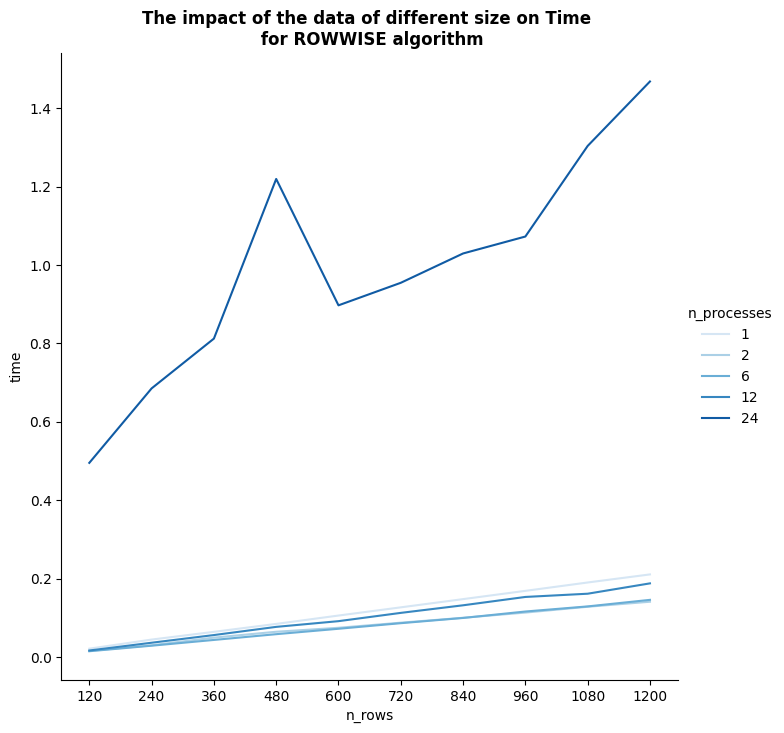

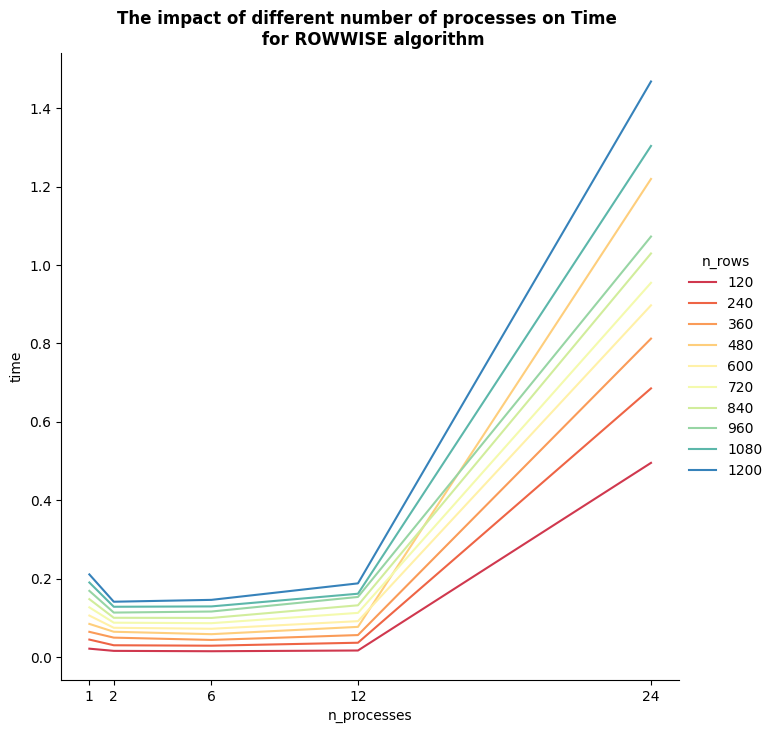

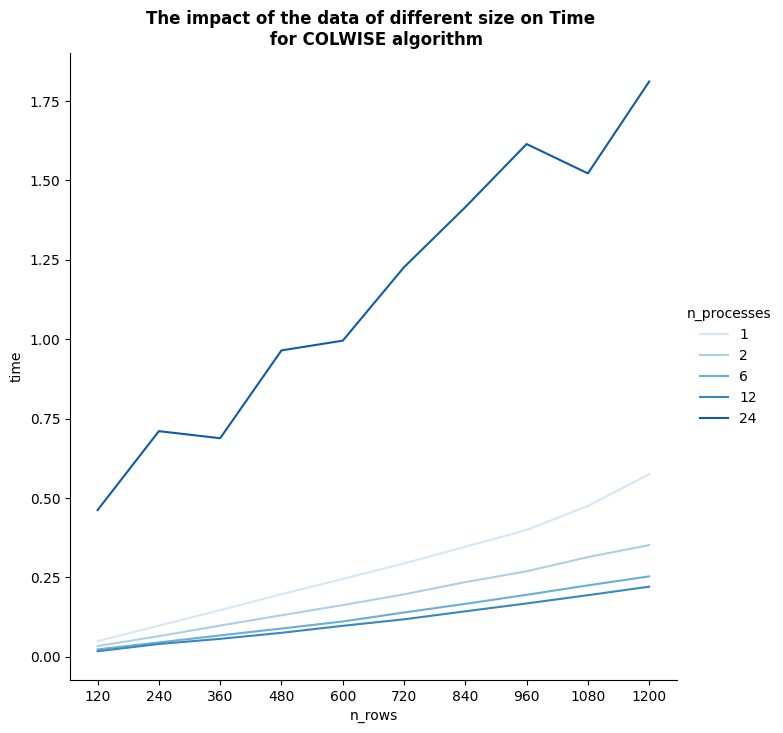

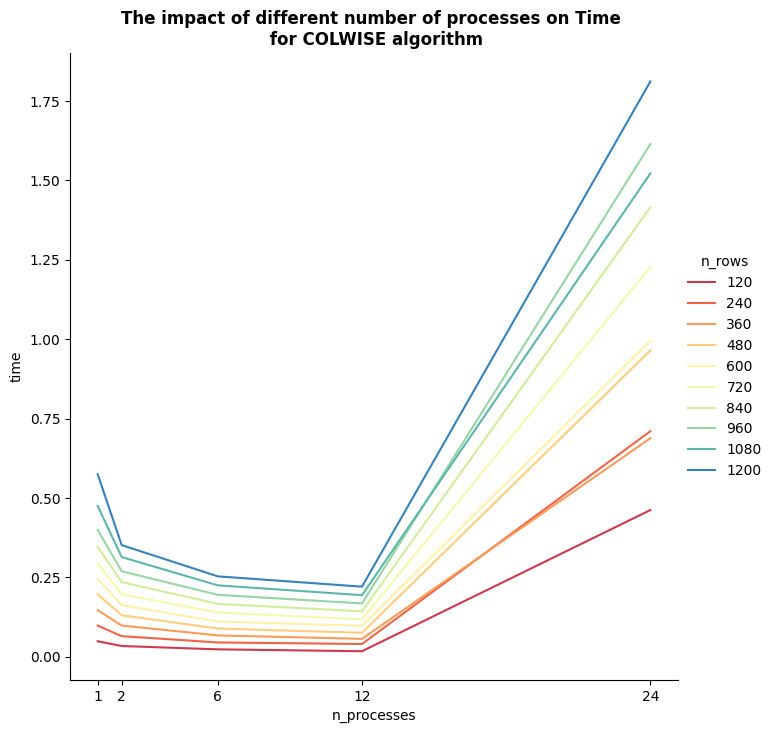

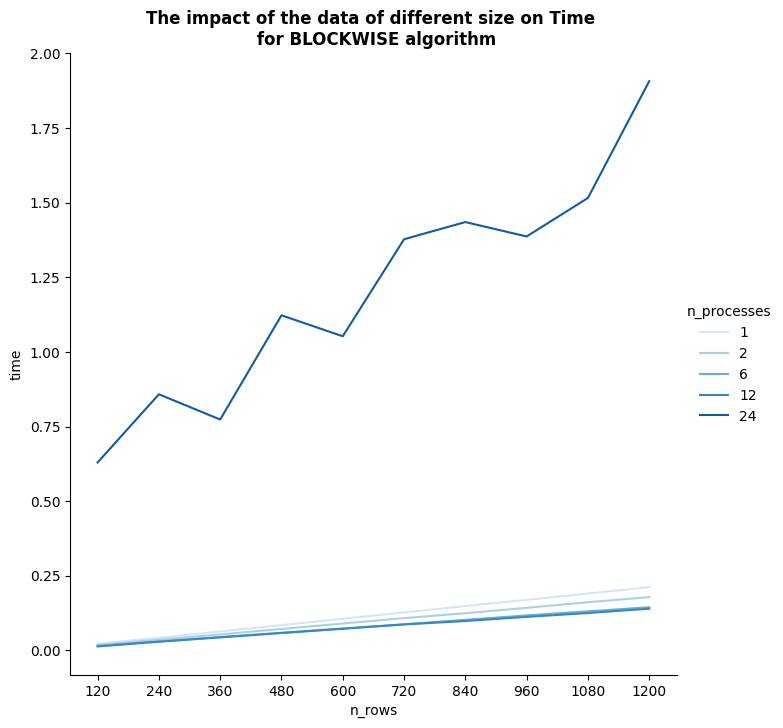

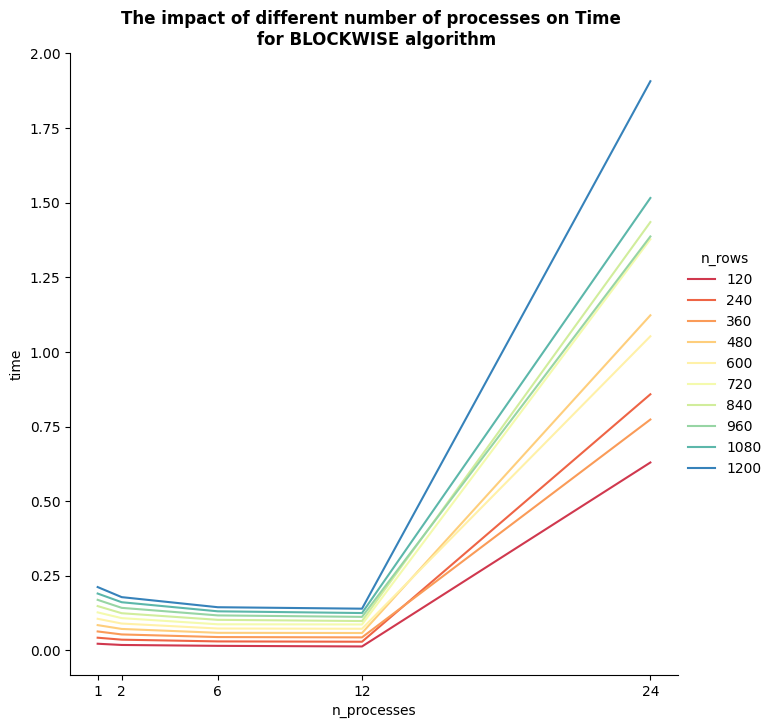

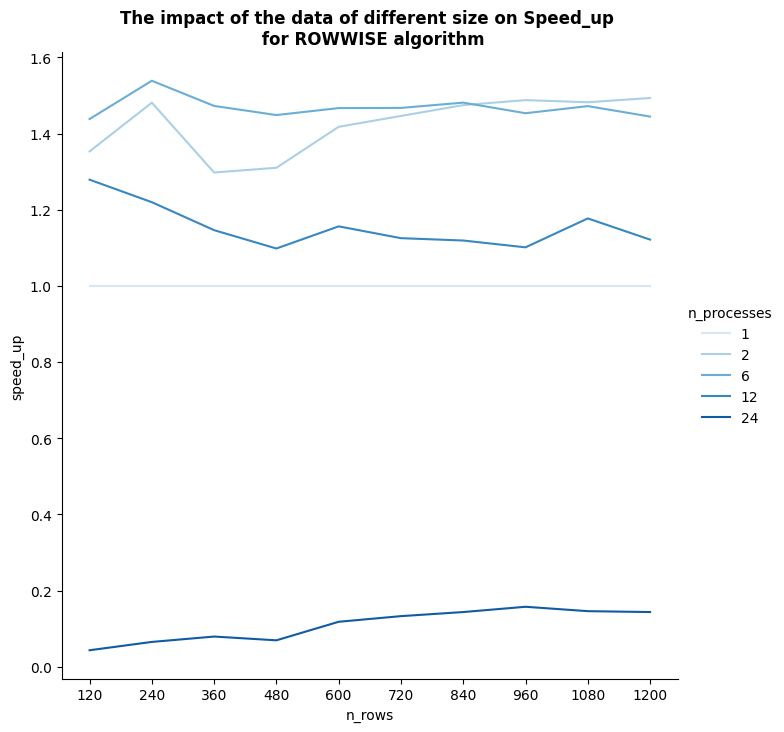

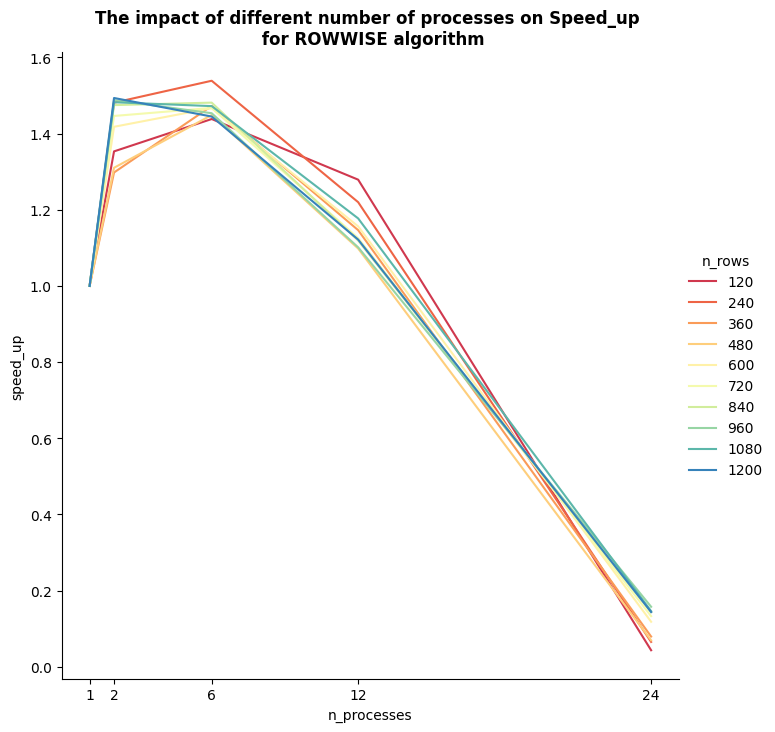

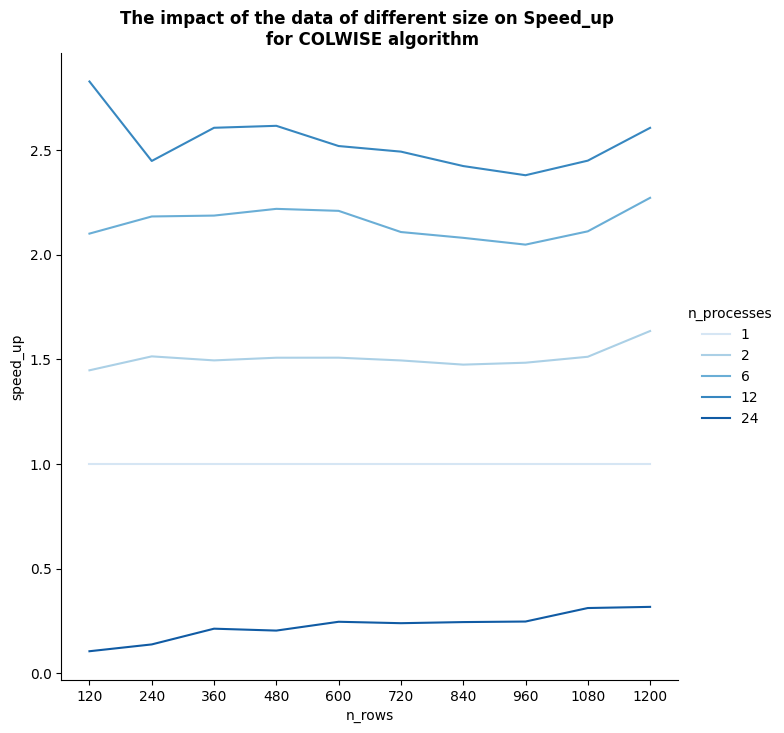

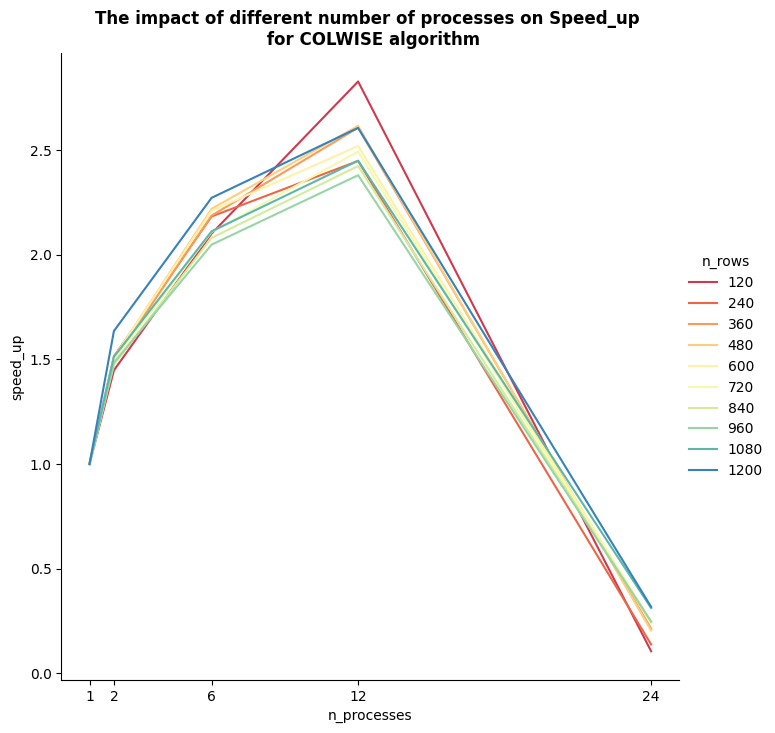

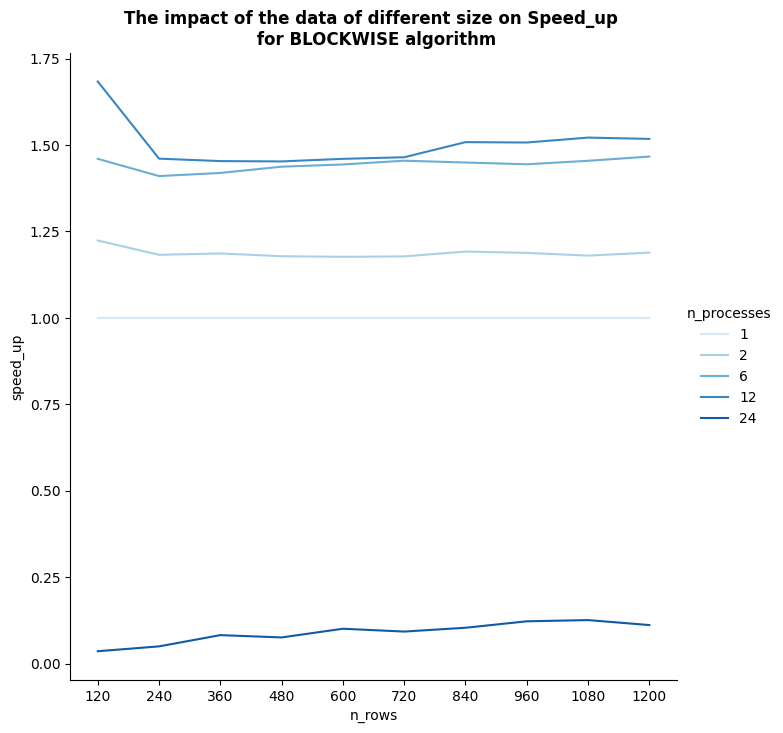

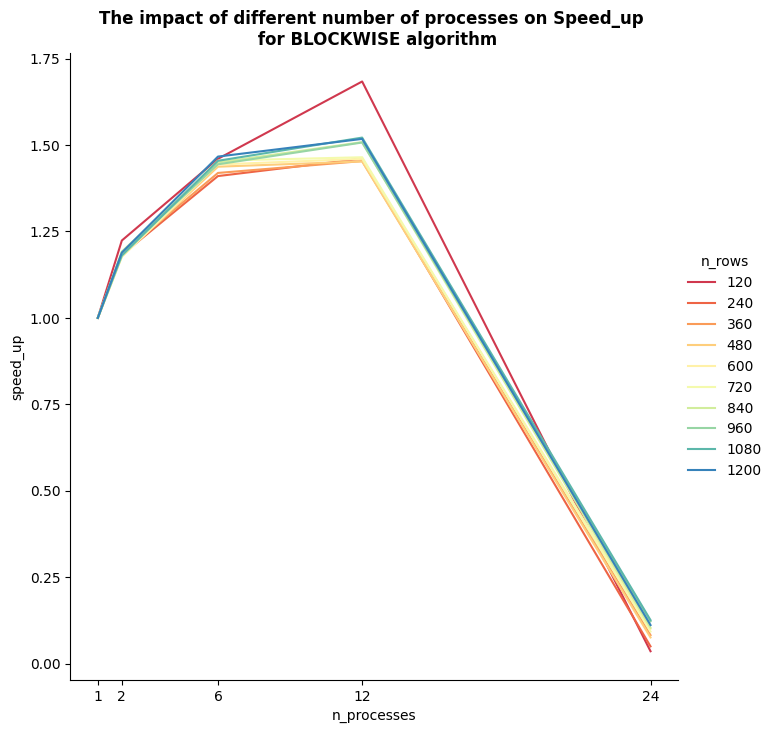

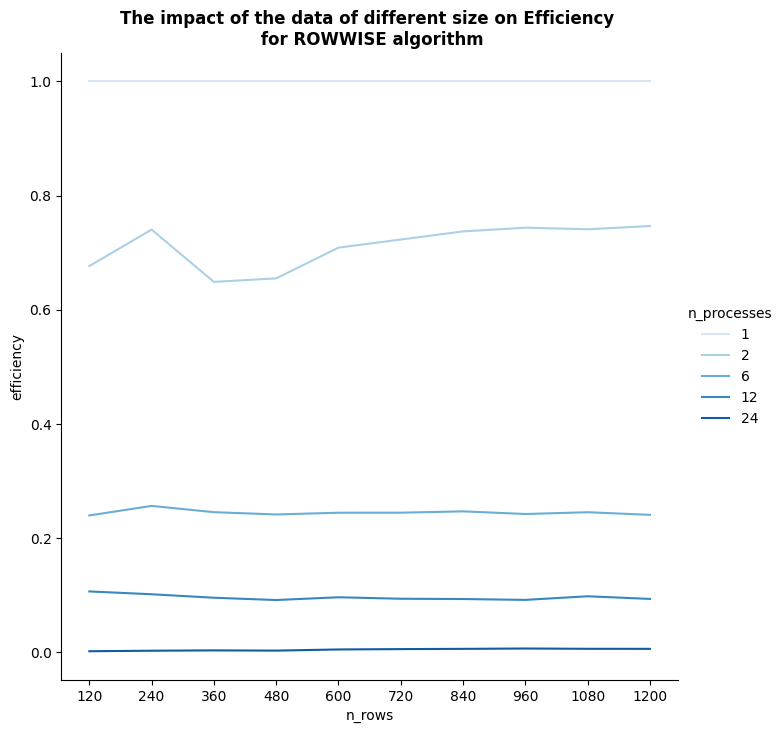

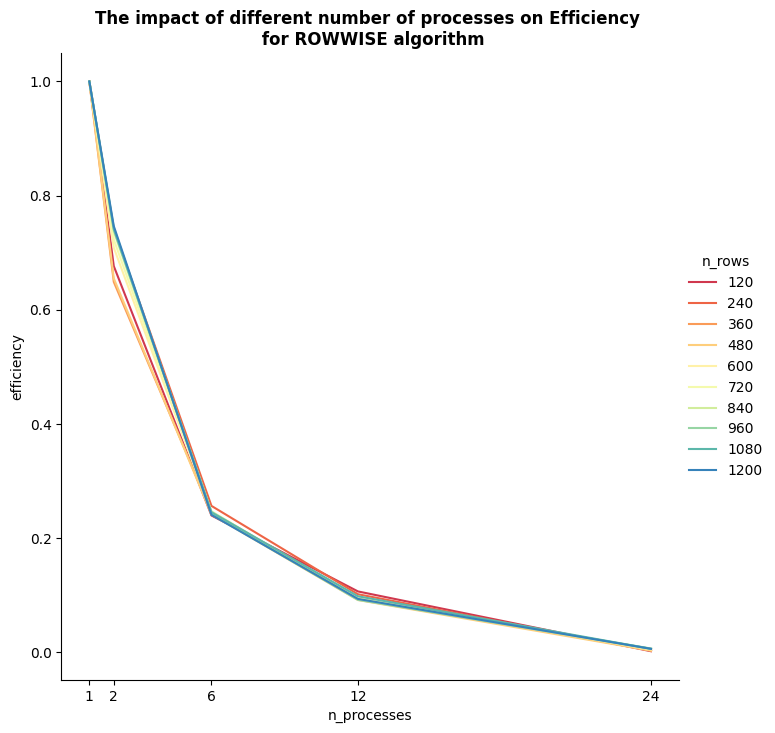

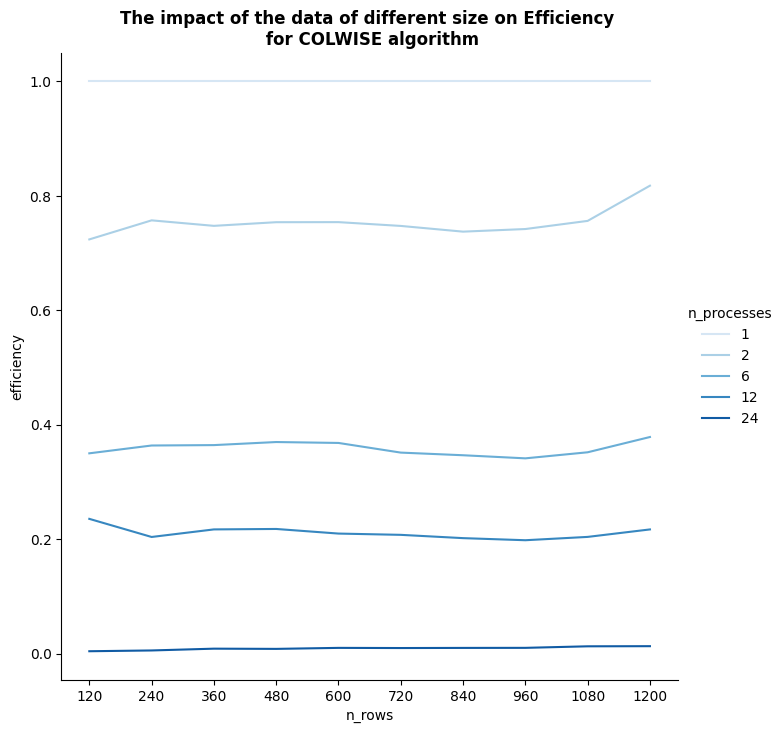

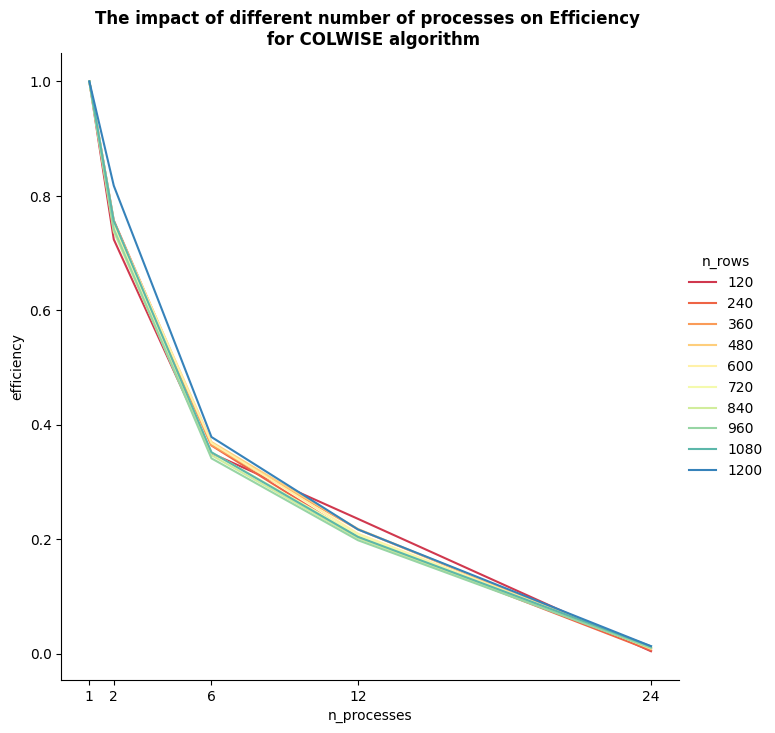

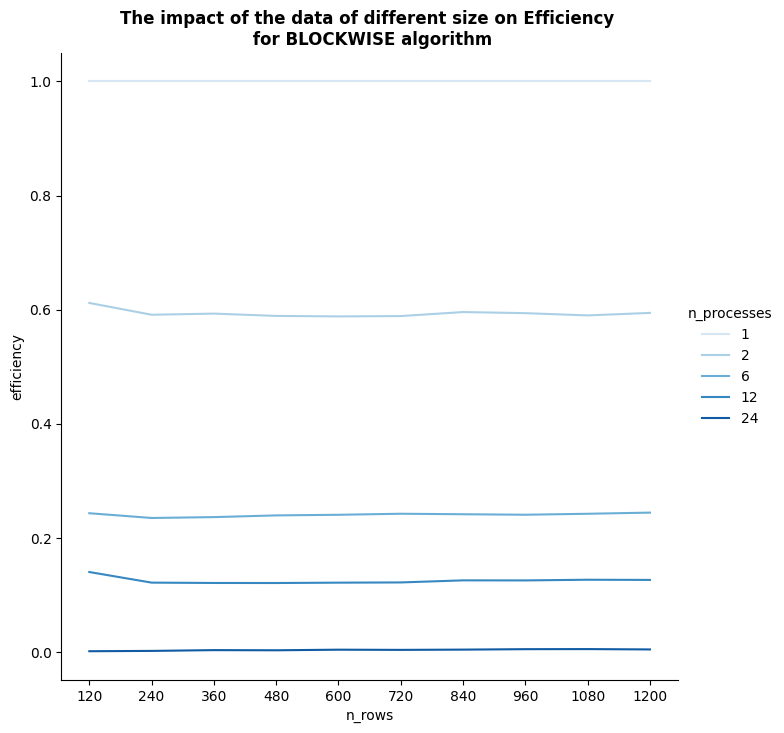

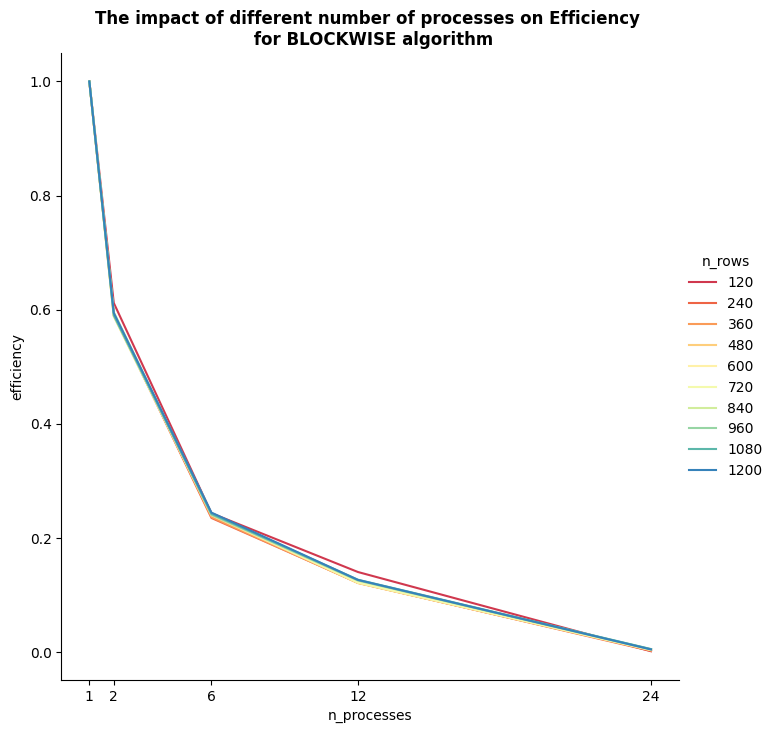

In [44]:
for metr in ['time', 'speed_up', 'efficiency']:
    for i, data in enumerate(datalist):
        g = sns.relplot(
            data,
            x='n_rows',
            y=metr,
            hue='n_processes',
            kind='line',
            palette=sns.color_palette('Blues', n_colors=data['n_processes'].nunique()),
            aspect=1,
            height=7
        )
    
        s = typenames[i]
        
        plt.title(f"The impact of the data of different size on {metr.capitalize()} \n for {s.upper()} algorithm", fontdict={'fontweight': 'bold'})
        plt.xticks(ticks=rowwise['n_rows'].unique(), labels=rowwise['n_rows'].unique())
        plt.show()
    
    
        g = sns.relplot(
            data,
            x='n_processes',
            y=metr,
            hue='n_rows',
            kind='line',
            palette=sns.color_palette('Spectral', n_colors=data['n_rows'].nunique()),
            aspect=1,
            height=7
        )
    
        s = typenames[i]
        
        plt.title(f"The impact of different number of processes on {metr.capitalize()} \n for {s.upper()} algorithm", fontdict={'fontweight': 'bold'})
        plt.xticks(ticks=rowwise['n_processes'].unique(), labels=rowwise['n_processes'].unique())
        plt.show()

---

In [47]:
stat.columns

Index(['n_rows_rowwise_rowwise', 'n_cols_rowwise_rowwise',
       'n_processes_rowwise_rowwise', 'time_rowwise_rowwise',
       'speed_up_rowwise_rowwise', 'efficiency_rowwise_rowwise',
       'n_rows_colwise_colwise', 'n_cols_colwise_colwise',
       'n_processes_colwise_colwise', 'time_colwise_colwise',
       'speed_up_colwise_colwise', 'efficiency_colwise_colwise',
       'n_rows_blockwise_blockwise', 'n_cols_blockwise_blockwise',
       'n_processes_blockwise_blockwise', 'time_blockwise_blockwise',
       'speed_up_blockwise_blockwise', 'efficiency_blockwise_blockwise'],
      dtype='object')

In [56]:
rowwise.columns = [col + '_rowwise' for col in rowwise.columns]
colwise.columns = [col + '_colwise' for col in colwise.columns]
blockwise.columns = [col + '_blockwise' for col in blockwise.columns]

stat = rowwise.join(colwise).join(blockwise)
stat = stat.drop(columns=['n_processes_blockwise', 'n_cols_blockwise', 'n_rows_blockwise', 'n_processes_colwise', 'n_cols_colwise', 'n_rows_colwise'])
stat.rename(columns={'n_rows_rowwise': 'n_rows', 'n_cols_rowwise': 'n_cols', 'n_processes_rowwise': 'n_processes'}, inplace=True)
stat.head(5)

n_rows  n_cols  n_processes  time_rowwise  speed_up_rowwise  \
0     120   60000            1      0.021460               1.0   
1     240   60000            1      0.044673               1.0   
2     360   60000            1      0.064399               1.0   
3     480   60000            1      0.084632               1.0   
4     600   60000            1      0.105948               1.0   

   efficiency_rowwise  time_colwise  speed_up_colwise  efficiency_colwise  \
0                 1.0      0.048639               1.0                 1.0   
1                 1.0      0.097946               1.0                 1.0   
2                 1.0      0.146609               1.0                 1.0   
3                 1.0      0.196778               1.0                 1.0   
4                 1.0      0.244976               1.0                 1.0   

   time_blockwise  speed_up_blockwise  efficiency_blockwise  
0        0.022440                 1.0                   1.0  
1        0.042650                 1.0                   1.0  
2        0.063614                 1.0                   1.0  
3        0.084843                 1.0                   1.0  
4        0.106018                 1.0                   1.0

In [90]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))

for i, n_proc in enumerate(stat['n_processes'].unique()):
    for j, metr in enumerate(['time', 'speed_up', 'efficiency']):
        cur_stat = stat.query('n_processes == @n_proc')
        
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_rowwise'], label='rowwise')
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_colwise'], label='colwise')
        axes[i][j].plot(cur_stat['n_rows'], cur_stat[f'{metr}_blockwise'], label='blockwise')

        axes[i][j].set_title(f'Dependence of {metr.capitalize()} \n on the number of `n_rows` being executed on {n_proc} processes', fontdict={'fontweight': 'bold'})
        
        axes[i][j].legend()
        
        axes[i][j].set_xticks(ticks=stat['n_rows'].unique(), labels=stat['n_rows'].unique())
        axes[i][j].set_xlabel('n_rows', fontdict={'fontweight': 'bold'})
        axes[i][j].set_ylabel(metr, fontdict={'fontweight': 'bold'})


plt.tight_layout()